In [1]:
import numpy as np
from matplotlib import pyplot as plt

from dftpy.ions import Ions
from dftpy.field import DirectField
from dftpy.grid import DirectGrid
from dftpy.functional import LocalPseudo, Functional, TotalFunctional, ExternalPotential
from dftpy.formats import io
from dftpy.math_utils import ecut2nr
from dftpy.optimization import Optimization


from ase.build import bulk
from ase.io.trajectory import Trajectory
from ase.lattice.spacegroup import Spacegroup
from ase.lattice.spacegroup import crystal

from sklearn.model_selection import train_test_split 
from sklearn.kernel_ridge import KernelRidge 
from dscribe.descriptors import CoulombMatrix, SineMatrix, EwaldSumMatrix, SOAP
from ase import Atoms
from ase.io import read

import cWT

/opt/homebrew/lib/python3.11/site-packages/ase/lattice/spacegroup.py:5: UserWarning: Moved to ase.spacegroup
  warnings.warn('Moved to ase.spacegroup')


In [2]:
import dftpy
dftpy.__path__

['/opt/homebrew/lib/python3.11/site-packages/dftpy']

In [3]:
path_pp='/Users/valeria/Documents/PP/ofpp/EAC/upf/blps/'
file='si.lda.upf'
PP_list = {'Si': path_pp+file}

In [4]:
import os
os.chdir('../')
path_file = os.getcwd()

In [5]:
import h5py
file = h5py.File("/Users/valeria/Documents/aiWT/Final_version/wt/wt/organize_data/Data_phases.hdf5", "r")
fileX = file["Descriptor"]
rho0_KE_WT = file["rho0_KE_wt"]
rho0_TE_WT = file["rho0_TE_wt"]
rho0_DEN_WT = file["rho0_DEN_wt"]
rho0_KE_SM = file["rho0_KE_sm"]
rho0_TE_SM = file["rho0_TE_sm"]
rho0_DEN_SM = file["rho0_DEN_sm"]
Rho = file["rho"]


rho0_KE_wt =[]
rho0_TE_wt =[]
rho0_DEN_wt=[]
rho0_KE_sm =[]
rho0_TE_sm =[]
rho0_DEN_sm =[]
rho = []
for i in np.arange(0,280):
    rho0_KE_wt.append(rho0_KE_WT[i][0]) 
    rho0_TE_wt.append(rho0_TE_WT[i][0]) 
    rho0_DEN_wt.append(rho0_DEN_WT[i][0])
    rho0_KE_sm.append(rho0_KE_SM[i][0]) 
    rho0_TE_sm.append(rho0_TE_SM[i][0]) 
    rho0_DEN_sm.append(rho0_DEN_SM[i][0])
    rho.append(Rho[i][0])

In [6]:
file.close()

In [7]:
rho0_Btin_KE_wt = rho0_KE_wt[0:30]; rho0_fcc_KE_wt = rho0_KE_wt[30:60]; rho0_bcc_KE_wt = rho0_KE_wt[60:90]; rho0_cd_KE_wt = rho0_KE_wt[90:120]; rho0_dhcp_KE_wt = rho0_KE_wt[120:150]; rho0_Btin_hd_KE_wt = rho0_KE_wt[150:180]; rho0_rand4_KE_wt = rho0_KE_wt[180:185]; rho0_rand8_KE_wt = rho0_KE_wt[185:190]; rho0_bct5_KE_wt = rho0_KE_wt[190:220]; rho0_hcp_KE_wt = rho0_KE_wt[220:250]; rho0_sh_KE_wt = rho0_KE_wt[250:280]

rho0_Btin_TE_wt = rho0_TE_wt[0:30];rho0_fcc_TE_wt = rho0_TE_wt[30:60];rho0_bcc_TE_wt = rho0_TE_wt[60:90];rho0_cd_TE_wt = rho0_TE_wt[90:120];rho0_dhcp_TE_wt = rho0_TE_wt[120:150];rho0_Btin_hd_TE_wt = rho0_TE_wt[150:180];rho0_rand4_TE_wt = rho0_TE_wt[180:185];rho0_rand8_TE_wt = rho0_TE_wt[185:190];rho0_bct5_TE_wt = rho0_TE_wt[190:220];rho0_hcp_TE_wt = rho0_TE_wt[220:250];rho0_sh_TE_wt = rho0_TE_wt[250:280]

rho0_Btin_DEN_wt = rho0_DEN_wt[0:30];rho0_fcc_DEN_wt = rho0_DEN_wt[30:60];rho0_bcc_DEN_wt = rho0_DEN_wt[60:90];rho0_cd_DEN_wt = rho0_DEN_wt[90:120];rho0_dhcp_DEN_wt = rho0_DEN_wt[120:150];rho0_Btin_hd_DEN_wt = rho0_DEN_wt[150:180];rho0_rand4_DEN_wt = rho0_DEN_wt[180:185];rho0_rand8_DEN_wt = rho0_DEN_wt[185:190];rho0_bct5_DEN_wt = rho0_DEN_wt[190:220];rho0_hcp_DEN_wt = rho0_DEN_wt[220:250];rho0_sh_DEN_wt = rho0_DEN_wt[250:280]

In [8]:
rho0_kin =[rho0_cd_KE_wt]#, rho0_dhcp_KE_wt]
rho0_den =[rho0_cd_DEN_wt]#, rho0_dhcp_DEN_wt]
rho0_ene =[rho0_cd_TE_wt]#, rho0_dhcp_TE_wt]
r = np.linspace(0.9, 3, 20)


In [40]:
rho0_den1 = np.hstack((np.asarray(rho0_den[0])))

In [ ]:
rho0_den2 = [0.03902422, ]

In [41]:
rho0_ene2 = np.asarray(rho0_ene[0]).min() * np.ones(8)
rho0_kin2 = np.asarray(rho0_kin[0]).min() * np.ones(8)
rho0_den2 = np.asarray(rho0_den[0]).min() * np.ones(8)

In [22]:
rho0_ene3 = np.hstack((np.asarray(rho0_ene[0]), rho0_ene2))
rho0_kin3 = np.hstack((np.asarray(rho0_kin[0]), rho0_kin2))
rho0_den3 = np.hstack((np.asarray(rho0_den1), rho0_den2))

In [23]:
len(rho0_ene3)

38

In [24]:
r2 = np.linspace(0.8,1.4, 30)
rr = [1.6, 1.8, 2.1, 2.3, 2.5, 2.7, 2.9, 3.0]
r3 = np.hstack((r2, rr))

In [25]:
len(r3)

38

In [26]:
rho0_mean = 0.03087804
# rho0_mean = 0.02961787

In [27]:
def TF_NL(material, r, rho0_ene, rho0_kin, rho0_den):
    pred_energy = []
    Volume = []
    wt_e_ave = []
    wt_e_den = []
    wt_e_ene = []
    wt_e_kin = []
    vw_e = []
    tf_e = []
    wt_s = []
    rho0_mean = []
    path_rho = None
    for j, d in enumerate(r):
        WT_KE_ave = Functional(type='KEDF',name='WT')
        WT_KE_ene = Functional(type='KEDF',name='WT', rho0=np.asarray(rho0_ene[0]).min())
        WT_KE_den = Functional(type='KEDF',name='WT', rho0=np.asarray(rho0_den[0]).min())
        WT_KE_kin = Functional(type='KEDF',name='WT', rho0=np.asarray(rho0_kin[0]).min())
        
        vW_KE = Functional(type='KEDF',name='vW')
        TF_KE = Functional(type='KEDF',name='TF')
         
        ions = Ions.from_ase(material)
        cell = ions.get_cell()
        ions.set_cell(cell * d, scale_atoms=True)
        nr = ecut2nr(ecut=25, lattice=ions.cell)
        grid = DirectGrid(lattice=ions.cell, nr=nr)
        PSEUDO = LocalPseudo(grid = grid, ions=ions, PP_list=PP_list, rcut=20)

        rho_ini = DirectField(grid=grid)
        rho_ini[:] = ions.get_ncharges()/ions.cell.volume
        print(type(rho_ini.mean()))
        WT_KE_scale = Functional(type='KEDF',name='WT', z=rho_ini.mean()/0.03087804)
        
        evaluator_ave = TotalFunctional(KE=WT_KE_ave,   XC=XC, HARTREE=HARTREE, PSEUDO=PSEUDO)
        evaluator_ene = TotalFunctional(KE=WT_KE_ene,   XC=XC, HARTREE=HARTREE, PSEUDO=PSEUDO)
        evaluator_den = TotalFunctional(KE=WT_KE_den,   XC=XC, HARTREE=HARTREE, PSEUDO=PSEUDO)
        evaluator_kin = TotalFunctional(KE=WT_KE_kin,   XC=XC, HARTREE=HARTREE, PSEUDO=PSEUDO)
        evaluator_vw  = TotalFunctional(KE=vW_KE,       XC=XC, HARTREE=HARTREE, PSEUDO=PSEUDO)
        evaluator_sca = TotalFunctional(KE=WT_KE_scale, XC=XC, HARTREE=HARTREE, PSEUDO=PSEUDO)
        
        optimization_options = {'econv' : 1e-7*ions.nat}
        
        opt_ave = Optimization(EnergyEvaluator=evaluator_ave, optimization_options = optimization_options, optimization_method = 'TN')
        opt_ene = Optimization(EnergyEvaluator=evaluator_ene, optimization_options = optimization_options, optimization_method = 'TN')
        opt_den = Optimization(EnergyEvaluator=evaluator_den, optimization_options = optimization_options, optimization_method = 'TN')
        opt_kin = Optimization(EnergyEvaluator=evaluator_kin, optimization_options = optimization_options, optimization_method = 'TN')
        opt_vw = Optimization(EnergyEvaluator=evaluator_vw, optimization_options = optimization_options, optimization_method = 'TN')
        opt_sca = Optimization(EnergyEvaluator=evaluator_sca, optimization_options = optimization_options, optimization_method = 'TN')
        
        rho_ave = opt_ave.optimize_rho(guess_rho=rho_ini)
        rho_ene = opt_ene.optimize_rho(guess_rho=rho_ini)
        rho_den = opt_den.optimize_rho(guess_rho=rho_ini)
        rho_kin = opt_kin.optimize_rho(guess_rho=rho_ini)
        rho_vw = opt_vw.optimize_rho(guess_rho=rho_ini)
        rho_sca = opt_sca.optimize_rho(guess_rho=rho_ini)
        
        
        
        wt_e_ave.append(WT_KE_ave(rho_ave).energy)
        wt_e_den.append(WT_KE_den(rho_ene).energy)
        wt_e_ene.append(WT_KE_den(rho_den).energy)
        wt_e_kin.append(WT_KE_den(rho_kin).energy)
        vw_e.append(vW_KE(rho_vw).energy)
        tf_e.append(TF_KE(rho_vw).energy)
        wt_s.append(WT_KE_scale(rho_sca).energy)
        rho0_mean.append(rho_ini.mean())
#     return np.asarray(rho0_mean)
    return np.asarray(wt_e_ave), np.asarray(vw_e), np.asarray(tf_e), np.asarray(wt_e_den), np.asarray(wt_e_ene), np.asarray(wt_e_kin), np.asarray(wt_s), np.asarray(rho0_mean)

In [28]:
def rho0(material):
    rho0 = []
    for j, d in enumerate(r):
        ions = Ions.from_ase(material)
        cell = ions.get_cell()
        ions.set_cell(cell * d, scale_atoms=True)
        nr = ecut2nr(ecut=25, lattice=ions.cell)
        grid = DirectGrid(lattice=ions.cell, nr=nr)
        ions.set_charges(4)
        rho_ini = DirectField(grid=grid)
        rho_ini[:] = ions.get_ncharges()/ions.cell.volume
        z=rho_ini.mean()
        rho0.append(z)
        
    return rho0

In [29]:
dictionary = {
    'Si_Btin': {'file': 'Si_Btin.vasp'}, 
    'Si_fcc': {'file': 'Si_fcc.vasp'},
    'Si_bcc': {'file': 'Si_bcc.vasp'},
    'Si_8cd': {'file': 'Si_cd.vasp'},
    'Si_dhcp': {'file': 'Si_dhcp.vasp'},
    'Si_bct5': {'file': 'Si_bct5.vasp'},
    'Si_sh': {'file': 'Si_sh.vasp'},
    'Si_cbcc': {'file': 'Si_cbcc.vasp'},
    'Si_hcp': {'file': 'Si_hcp.vasp'},
}

In [30]:
def get_ions(phase):
    inputfile = path_file+'/Structures/'+dictionary[phase]['file']
    ions = read(inputfile, format='vasp')
    return ions

In [31]:
path_file

'/Users/valeria/Documents/aiWT/Final_version/wt/wt/Results'

In [32]:
Phases = ['Si_8cd']#, 'Si_dhcp'] 

In [33]:
for i,p in enumerate(Phases):
    ions = get_ions(p)
    print(p,len(ions))

Si_8cd 8


In [34]:
PP_list = PP_list
XC = Functional(type='XC',name='LDA')
HARTREE = Functional(type='HARTREE')

In [35]:
ions = get_ions('Si_8cd')
rho0 = rho0(ions)

In [36]:
len(r3)

38

In [37]:
Volume = []
Cwt_energy_ke = []
Cwt_kin_ke = []
wt_e_den = {}
wt_e_ene = {}
wt_e_kin = {}
wt_e_ave = {}
vw_e = {}
tf_e = {}
wt_e_sca = {}
rho0_mean = []
# np.asarray(wt_e_ave), np.asarray(vw_e), np.asarray(tf_e), 
# np.asarray(wt_e_den), np.asarray(wt_e_ene), np.asarray(wt_e_kin), np.asarray(wt_s)
for i,p in enumerate(Phases):
    print('Iteration: ', i)
    ions = get_ions(p)
    tf_wt = TF_NL(ions, r3,rho0_ene3, rho0_kin3, rho0_den3)
#     print(np.asarray(tf_wt).shape)
    wt_e_ave[p] =tf_wt[0]
    vw_e[p] =tf_wt[1]
    tf_e[p] =tf_wt[2]
    wt_e_den[p] =tf_wt[3]
    wt_e_ene[p] =tf_wt[4]
    wt_e_kin[p] =tf_wt[5]
    wt_e_sca[p] =tf_wt[6]
    rho0_mean.append(tf_wt[7])

Iteration:  0
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
<class 'numpy.ndarray'>
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.757753820085E+01     -2.757754E+01   9.443759E+00    1       1       7.100391E-02    
1       -3.078754942265E+01     -3.210011E+00   4.655313E-01    10      2       1.691189E-01    
2       -3.081502150073E+01     -2.747208E-02   2.584880E-02    4       1       1.868958E-01    
3       -3.081748854345E+01     -2.467043E-03   1.632974E-03    5       1       2.144279E-01    
4       -3.081763332717E+01     -1.447837E-04   1.153116E-04    6       1       2.322917E-01    
5       -3.081764195417E+01     -8.626992E-06   9.675269E-06    5       1       2.550869E-01    
6       -3.081764322620E+01     -1.272035E-06   1.992282E-07    7       1       2.768860E-01    
7       -3.081764323798E+01     -1.177977E-08   1.044161E-08    3       1       2.994809E-01    
8       -3.08

18      -3.154981362804E+02     -5.390206E-03   1.457830E+02    2       2       2.823796E-01    
!WARN : pAp small than zero :iter =  3 -11324.944943963335
19      -3.155015295209E+02     -3.393240E-03   1.456397E+02    4       1       3.011558E-01    
20      -3.155064368388E+02     -4.907318E-03   1.453509E+02    2       7       3.288519E-01    
21      -3.155065567730E+02     -1.199342E-04   1.452938E+02    12      3       3.637378E-01    
22      -3.155130554528E+02     -6.498680E-03   1.449028E+02    2       1       3.740270E-01    
23      -3.155133842023E+02     -3.287495E-04   1.449159E+02    2       1       3.839617E-01    
24      -3.155195504454E+02     -6.166243E-03   1.445214E+02    2       6       4.148049E-01    
!WARN : pAp small than zero :iter =  3 -703145052.6674229
25      -3.155205467032E+02     -9.962578E-04   1.445230E+02    4       1       4.255209E-01    
26      -3.155246710769E+02     -4.124374E-03   1.442427E+02    2       4       4.427938E-01    
27      -3

93      -3.155685854944E+02     -3.376371E-03   1.415954E+02    2       8       1.021183E+00    
94      -3.155688551429E+02     -2.696484E-04   1.415703E+02    12      6       1.047427E+00    
95      -3.155695005679E+02     -6.454251E-04   1.415301E+02    2       1       1.052864E+00    
96      -3.155697154355E+02     -2.148676E-04   1.415218E+02    2       1       1.058711E+00    
97      -3.155703027504E+02     -5.873148E-04   1.414841E+02    2       1       1.064720E+00    
!WARN : pAp small than zero :iter =  1 -482804758.5289335
98      -3.155704693664E+02     -1.666160E-04   1.414709E+02    2       1       1.073430E+00    
99      -3.155711650156E+02     -6.956493E-04   1.414222E+02    2       1       1.081048E+00    
100     -3.155714039337E+02     -2.389181E-04   1.414121E+02    2       1       1.086643E+00    
101     -3.155719766115E+02     -5.726778E-04   1.413751E+02    2       1       1.092105E+00    
102     -3.155722595288E+02     -2.829173E-04   1.413616E+02    2    

171     -3.156028939653E+02     -4.633646E-04   1.394691E+02    2       9       1.631774E+00    
172     -3.156030483835E+02     -1.544182E-04   1.394540E+02    12      6       1.661013E+00    
173     -3.156032920053E+02     -2.436218E-04   1.394378E+02    2       1       1.666227E+00    
174     -3.156034153329E+02     -1.233276E-04   1.394312E+02    2       1       1.671727E+00    
175     -3.156036353050E+02     -2.199721E-04   1.394166E+02    2       1       1.678202E+00    
176     -3.156037719422E+02     -1.366372E-04   1.394086E+02    2       1       1.684135E+00    
177     -3.156039804846E+02     -2.085424E-04   1.393947E+02    2       1       1.689948E+00    
178     -3.156041502630E+02     -1.697784E-04   1.393850E+02    3       1       1.698429E+00    
179     -3.156043134453E+02     -1.631824E-04   1.393755E+02    2       1       1.703951E+00    
!WARN : pAp small than zero :iter =  1 -941646320.9983021
180     -3.156044692638E+02     -1.558184E-04   1.393619E+02    2    

6       -4.388138142185E+01     -3.378765E-05   5.474268E-06    6       1       6.964469E-02    
7       -4.388138214708E+01     -7.252356E-07   4.736611E-07    4       1       7.836080E-02    
8       -4.388138220680E+01     -5.972066E-08   4.345238E-08    5       1       8.624482E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.16799969461192302
Chemical potential (eV)  : -4.571504542060847
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.779657423948E+01     -2.779657E+01   9.060456E+00    1       1       5.465031E-03    
1       -3.324778281891E+01     -5.451209E+00   1.684243E+00    14      3       3.357530E-02    
!WARN : pAp small than zero :iter =  11 -91823.58288681901
2       -4.090674241435E+01     -7.658960E+00   3.612600E+01    12      7       7.118106E-02    
!WARN : pAp small than zero :iter =  3 -136492.56916821058
3       -5.368665538965E+01     -1.277991E+01   2.163959E+02    4   

69      -1.972361443160E+02     -7.989161E-05   6.170970E+01    2       1       8.107271E-01    
70      -1.972362191629E+02     -7.484696E-05   6.170678E+01    2       1       8.161652E-01    
71      -1.972362977711E+02     -7.860810E-05   6.170362E+01    2       1       8.234742E-01    
72      -1.972363729778E+02     -7.520677E-05   6.170069E+01    2       1       8.298891E-01    
73      -1.972364511913E+02     -7.821346E-05   6.169755E+01    2       1       8.373592E-01    
74      -1.972365267079E+02     -7.551662E-05   6.169460E+01    2       1       8.429041E-01    
75      -1.972366045470E+02     -7.783905E-05   6.169148E+01    2       1       8.517811E-01    
76      -1.972366803341E+02     -7.578716E-05   6.168851E+01    2       1       8.585479E-01    
77      -1.972367578952E+02     -7.756111E-05   6.168542E+01    2       1       8.639641E-01    
78      -1.972368338555E+02     -7.596027E-05   6.168243E+01    2       1       8.742599E-01    
79      -1.972369112033E+02   

6       -3.153726451965E+01     -7.495336E-07   1.049199E-06    4       1       9.505892E-02    
7       -3.153726473163E+01     -2.119849E-07   8.295133E-08    6       1       1.086280E-01    
8       -3.153726474223E+01     -1.059846E-08   3.098771E-09    8       1       1.247818E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.44504925817502244
Chemical potential (eV)  : 12.110407164058815
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -4.037320887693E+01     -4.037321E+01   8.723850E+00    1       1       2.039909E-03    
!WARN : pAp small than zero :iter =  9 -5806.272488346274
1       -4.254947892807E+01     -2.176270E+00   9.736389E+00    10      2       1.786900E-02    
2       -4.350183905739E+01     -9.523601E-01   3.651579E-01    5       1       2.500796E-02    
3       -4.353225885494E+01     -3.041980E-02   2.461596E-02    5       1       3.431201E-02    
4       -4.353560375252E+01     

54      -2.089697857257E+03     -7.966143E-05   3.893872E+02    2       1       5.794113E-01    
55      -2.089697935903E+03     -7.864544E-05   3.893776E+02    2       1       5.874560E-01    
56      -2.089698015755E+03     -7.985251E-05   3.893681E+02    2       1       5.943670E-01    
57      -2.089698094378E+03     -7.862262E-05   3.893586E+02    2       1       6.000249E-01    
58      -2.089698174225E+03     -7.984655E-05   3.893490E+02    2       1       6.057560E-01    
59      -2.089698253003E+03     -7.877865E-05   3.893394E+02    2       1       6.132321E-01    
60      -2.089698332584E+03     -7.958034E-05   3.893299E+02    2       1       6.194820E-01    
61      -2.089698411355E+03     -7.877117E-05   3.893204E+02    2       1       6.267040E-01    
62      -2.089698491085E+03     -7.973030E-05   3.893108E+02    2       1       6.324961E-01    
63      -2.089698569731E+03     -7.864577E-05   3.893014E+02    2       1       6.383882E-01    
64      -2.089698649485E+03   

139     -2.090070359228E+03     -1.385384E-05   3.490979E+02    2       1       1.235711E+00    
140     -2.090070373082E+03     -1.385364E-05   3.490962E+02    2       1       1.242065E+00    
141     -2.090070386935E+03     -1.385347E-05   3.490945E+02    2       1       1.248865E+00    
142     -2.090070400789E+03     -1.385328E-05   3.490928E+02    2       1       1.255187E+00    
143     -2.090070414642E+03     -1.385312E-05   3.490911E+02    2       1       1.263609E+00    
144     -2.090070428495E+03     -1.385292E-05   3.490894E+02    2       1       1.270135E+00    
145     -2.090070442348E+03     -1.385273E-05   3.490877E+02    2       1       1.279103E+00    
146     -2.090070456200E+03     -1.385258E-05   3.490859E+02    2       1       1.285141E+00    
147     -2.090070470052E+03     -1.385238E-05   3.490842E+02    2       1       1.292389E+00    
148     -2.090070483905E+03     -1.385219E-05   3.490825E+02    2       1       1.297916E+00    
149     -2.090070497757E+03   

Chemical potential (eV)  : 10.99093666839756
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.804422857688E+01     -2.804423E+01   8.431827E+00    1       1       3.353119E-03    
1       -3.161601566159E+01     -3.571787E+00   4.150299E-01    12      2       3.083229E-02    
2       -3.165752940273E+01     -4.151374E-02   2.935189E-02    5       1       4.168701E-02    
3       -3.165995627493E+01     -2.426872E-03   2.679507E-03    4       1       5.097008E-02    
4       -3.166034406786E+01     -3.877929E-04   2.612834E-04    6       1       6.329513E-02    
5       -3.166035793622E+01     -1.386836E-05   1.998093E-05    4       1       7.514405E-02    
6       -3.166036091097E+01     -2.974749E-06   1.487289E-06    6       1       8.726621E-02    
7       -3.166036103272E+01     -1.217495E-07   6.086430E-08    7       1       1.018941E-01    
8       -3.166036103678E+01     -4.059839E-09   4.820873E-09    5       1       1.

2       -3.182157899528E+01     -5.274351E-02   4.059535E-02    5       1       3.915596E-02    
3       -3.182485535209E+01     -3.276357E-03   3.446912E-03    4       1       4.970908E-02    
4       -3.182539178132E+01     -5.364292E-04   2.443381E-04    6       1       6.256795E-02    
5       -3.182540422615E+01     -1.244482E-05   2.003502E-05    3       1       7.056999E-02    
6       -3.182540698948E+01     -2.763338E-06   1.449243E-06    6       1       8.476114E-02    
7       -3.182540717072E+01     -1.812331E-07   8.918940E-08    8       1       1.001201E-01    
8       -3.182540717356E+01     -2.841141E-09   7.324143E-09    2       1       1.064351E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.3659932162675952
Chemical potential (eV)  : 9.959182690157258
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -3.937740710511E+01     -3.937741E+01   8.177965E+00    1       1       3.158092E-03

5       -4.248867078347E+01     -3.959829E-04   1.397282E-04    7       1       5.578017E-02    
6       -4.248868204753E+01     -1.126405E-05   1.142010E-05    4       1       6.269002E-02    
7       -4.248868328054E+01     -1.233010E-06   7.426119E-07    6       1       7.155514E-02    
8       -4.248868334430E+01     -6.376521E-08   2.654746E-08    7       1       8.280182E-02    
9       -4.248868334691E+01     -2.610186E-09   2.248705E-09    5       1       9.105396E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.21846668754936818
Chemical potential (eV)  : -5.944781368370682
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.809508523863E+01     -2.809509E+01   7.953413E+00    1       1       2.756119E-03    
1       -3.238746728076E+01     -4.292382E+00   4.495657E-01    13      2       2.791691E-02    
2       -3.243590356959E+01     -4.843629E-02   3.293786E-02    5       1       3.916001E

7       -3.230104854105E+01     -1.159468E-08   1.162119E-08    5       1       1.490080E-01    
8       -3.230104854233E+01     -1.276938E-09   1.168390E-09    7       1       1.676962E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.28741132703065486
Chemical potential (eV)  : 7.820860567606805
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
<class 'numpy.ndarray'>
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.800139567137E+01     -2.800140E+01   7.567683E+00    1       1       2.654099E-02    
1       -3.181431720775E+01     -3.812922E+00   4.106029E-01    14      2       1.329122E-01    
2       -3.191014719759E+01     -9.582999E-02   3.137149E-02    7       1       1.700630E-01    
3       -3.191241977406E+01     -2.272576E-03   1.955544E-03    5       1       1.926141E-01    
4       -3.191265134022E+01     -2.315662E-04   1.534356E-04    6       1       2.245622

#### Density Optimization Converged ####
Chemical potential (a.u.): 0.2464119304718558
Chemical potential (eV)  : 6.70521016107921
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.791280881897E+01     -2.791281E+01   7.400520E+00    1       1       4.820347E-03    
1       -3.182470297098E+01     -3.911894E+00   3.666646E-01    15      2       4.273224E-02    
2       -3.192893185565E+01     -1.042289E-01   2.458365E-02    7       1       5.992222E-02    
3       -3.193067533873E+01     -1.743483E-03   2.245557E-03    4       1       7.097340E-02    
4       -3.193094082214E+01     -2.654834E-04   1.169848E-04    6       1       8.676243E-02    
5       -3.193095237546E+01     -1.155332E-05   1.157750E-05    6       1       1.030662E-01    
6       -3.193095358043E+01     -1.204965E-06   7.315038E-07    7       1       1.225553E-01    
7       -3.193095365866E+01     -7.822934E-08   5.227071E-08    6       1       1.380963E-01 

2       -3.188282875983E+01     -1.286754E-01   2.492443E-02    7       1       5.944395E-02    
3       -3.188469258029E+01     -1.863820E-03   2.355997E-03    4       1       7.114601E-02    
4       -3.188497265404E+01     -2.800737E-04   1.118654E-04    6       1       8.917618E-02    
5       -3.188498555550E+01     -1.290147E-05   7.147499E-06    7       1       1.084123E-01    
6       -3.188498628677E+01     -7.312607E-07   6.158167E-07    6       1       1.251500E-01    
7       -3.188498638088E+01     -9.411296E-08   3.926853E-08    8       1       1.449811E-01    
8       -3.188498638286E+01     -1.982464E-09   3.038178E-09    3       1       1.539431E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.22285300968532634
Chemical potential (eV)  : 6.064139273239467
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.780169248545E+01     -2.780169E+01   7.248647E+00    1       1       6.113052E-0

#### Density Optimization Converged ####
Chemical potential (a.u.): 0.19871479699442912
Chemical potential (eV)  : 5.407305049769183
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -3.634665471499E+01     -3.634665E+01   7.111207E+00    1       1       2.454996E-03    
!WARN : pAp small than zero :iter =  9 -280625.0911506539
1       -3.903211808029E+01     -2.685463E+00   1.810111E+01    10      2       2.611113E-02    
2       -4.062613726279E+01     -1.594019E+00   1.255801E+00    5       1       3.705192E-02    
3       -4.082141222044E+01     -1.952750E-01   8.822990E-02    8       1       5.596590E-02    
4       -4.083015279705E+01     -8.740577E-03   6.235741E-03    7       1       7.043815E-02    
5       -4.083110437235E+01     -9.515753E-04   2.923687E-04    9       1       8.848214E-02    
6       -4.083111722326E+01     -1.285091E-05   2.669704E-05    3       1       9.634995E-02    
7       -4.083111973287E+01     -

4       -3.180265789902E+01     -2.302270E-04   1.157452E-04    7       1       1.164548E-01    
5       -3.180267171390E+01     -1.381488E-05   8.840562E-06    8       1       1.420889E-01    
6       -3.180267237208E+01     -6.581866E-07   7.937112E-07    5       1       1.585588E-01    
7       -3.180267250683E+01     -1.347497E-07   5.068042E-08    8       1       1.825998E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.17991189750947664
Chemical potential (eV)  : 4.895652093506764
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
<class 'numpy.ndarray'>
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.736404744736E+01     -2.736405E+01   6.874183E+00    1       1       4.736781E-02    
1       -3.185193638141E+01     -4.487889E+00   3.430280E-01    19      2       1.357577E-01    
2       -3.202835320726E+01     -1.764168E-01   2.143286E-02    8       1       1.832259

8       -3.203965893886E+01     -7.366552E-09   3.302806E-09    9       1       3.589470E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.1331939170568669
Chemical potential (eV)  : 3.624391093131958
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.719172352177E+01     -2.719172E+01   6.771636E+00    1       1       4.118919E-03    
1       -3.158852904146E+01     -4.396806E+00   3.252097E-01    19      2       5.803585E-02    
2       -3.175102240718E+01     -1.624934E-01   2.872881E-02    7       1       8.023596E-02    
3       -3.175291031183E+01     -1.887905E-03   1.743801E-03    5       1       9.700489E-02    
4       -3.175308333301E+01     -1.730212E-04   1.711569E-04    6       1       1.160398E-01    
5       -3.175309637316E+01     -1.304015E-05   1.418018E-05    7       1       1.376879E-01    
6       -3.175309754145E+01     -1.168285E-06   1.044485E-06    6       1       1.571739E-01

1       -3.137017138052E+01     -4.360628E+00   7.197752E-01    18      2       1.102929E-01    
2       -3.164851396302E+01     -2.783426E-01   5.470476E-02    8       1       1.583869E-01    
3       -3.165178448588E+01     -3.270523E-03   4.132502E-03    5       1       1.902950E-01    
4       -3.165228632583E+01     -5.018400E-04   2.596692E-04    7       1       2.324519E-01    
5       -3.165231105436E+01     -2.472853E-05   1.477524E-05    8       1       2.795062E-01    
6       -3.165231247593E+01     -1.421569E-06   1.291678E-06    6       1       3.176188E-01    
7       -3.165231269495E+01     -2.190221E-07   9.936014E-08    8       1       3.645999E-01    
8       -3.165231270209E+01     -7.139491E-09   9.647453E-09    5       1       3.978040E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.12254841094667039
Chemical potential (eV)  : 3.3347121169426406
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)   

4       -3.166194917679E+01     -4.157048E-04   3.614080E-04    7       1       2.425599E-01    
5       -3.166197245317E+01     -2.327638E-05   3.366131E-05    5       1       2.751808E-01    
6       -3.166197952120E+01     -7.068030E-06   2.095248E-06    9       2       3.334830E-01    
7       -3.166197958788E+01     -6.668203E-08   1.750200E-07    2       1       3.505170E-01    
8       -3.166197961060E+01     -2.271947E-08   1.097415E-08    7       2       3.989420E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.10478428149648406
Chemical potential (eV)  : 2.8513255330867895
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -3.395322841354E+01     -3.395323E+01   6.589396E+00    1       1       4.251957E-03    
!WARN : pAp small than zero :iter =  8 -26691.141756051424
1       -3.786571923040E+01     -3.912491E+00   1.776231E+01    9       2       4.563475E-02    
2       -3.926498147277E+01    

7       -3.914932614183E+01     -5.204519E-06   2.100509E-06    10      1       2.207243E-01    
8       -3.914932633085E+01     -1.890218E-07   1.678059E-07    5       1       2.425582E-01    
9       -3.914932634469E+01     -1.383665E-08   1.538717E-08    5       1       2.645423E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.28525270046082923
Chemical potential (eV)  : -7.762121346732824
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.662192312079E+01     -2.662192E+01   6.505951E+00    1       1       6.608963E-03    
1       -3.099499729339E+01     -4.373074E+00   8.864142E-01    18      2       1.111338E-01    
2       -3.134846287728E+01     -3.534656E-01   7.645954E-02    10      1       1.682179E-01    
3       -3.135459614512E+01     -6.133268E-03   5.804779E-03    6       1       2.053988E-01    
4       -3.135527780598E+01     -6.816609E-04   5.579934E-04    7       1       2.477441E

8       -3.126504636862E+01     -1.463702E-08   8.003643E-09    7       1       3.756909E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.08158109542118601
Chemical potential (eV)  : 2.2199346797966313
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
<class 'numpy.ndarray'>
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.621187947082E+01     -2.621188E+01   6.346874E+00    1       1       9.999037E-03    
1       -2.917854365862E+01     -2.966664E+00   2.523101E+01    13      5       1.319931E-01    
2       -3.199112000254E+01     -2.812576E+00   1.350579E+00    8       1       1.855233E-01    
3       -3.211983743428E+01     -1.287174E-01   1.308404E-01    8       1       2.379961E-01    
4       -3.212781070294E+01     -7.973269E-03   1.140687E-02    4       1       2.725213E-01    
5       -3.213073464191E+01     -2.923939E-03   9.629607E-04    15      2       3.30240

9       -3.216412407915E+01     -4.348593E-08   1.551546E-08    10      1       5.112801E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.0339630262484298
Chemical potential (eV)  : 0.9241810178017404
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.600107447264E+01     -2.600107E+01   6.269801E+00    1       1       5.236864E-03    
1       -3.113186911526E+01     -5.130795E+00   4.242470E+00    12      2       5.611110E-02    
2       -3.135434457402E+01     -2.224755E-01   3.880746E-01    3       1       7.130003E-02    
3       -3.139201650213E+01     -3.767193E-02   1.865904E-02    5       1       9.482479E-02    
4       -3.139684155943E+01     -4.825057E-03   1.921897E-03    13      1       1.464949E-01    
5       -3.139712790079E+01     -2.863414E-04   1.830613E-04    8       1       1.805499E-01    
6       -3.139713913323E+01     -1.123243E-05   1.360527E-05    5       1       2.032177E-0

5       -3.133775287495E+01     -2.780271E-04   2.337481E-04    4       1       1.913700E-01    
6       -3.133779808665E+01     -4.521171E-05   1.142450E-05    8       1       2.252321E-01    
7       -3.133779956799E+01     -1.481335E-06   7.509966E-07    10      1       2.628901E-01    
8       -3.133779961488E+01     -4.688763E-08   7.039940E-08    4       1       2.811840E-01    
9       -3.133779962369E+01     -8.819452E-09   6.738895E-09    6       1       3.073552E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.03658617057525848
Chemical potential (eV)  : 0.9955604106767046
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.578755241097E+01     -2.578755E+01   6.194282E+00    1       1       6.282330E-03    
1       -3.100758738018E+01     -5.220035E+00   4.484950E+00    13      2       6.136489E-02    
2       -3.124163814937E+01     -2.340508E-01   4.250470E-01    3       1       7.691097E-

!WARN : pAp small than zero :iter =  15 -264683.94311503705
1       -3.025380796530E+01     -4.681775E+00   2.157015E+00    16      3       7.293105E-02    
2       -3.119389203782E+01     -9.400841E-01   1.512343E-01    8       1       1.059132E-01    
3       -3.123238289982E+01     -3.849086E-02   9.556114E-03    12      1       1.530111E-01    
4       -3.123346869963E+01     -1.085800E-03   7.461743E-04    7       1       1.824262E-01    
5       -3.123358645713E+01     -1.177575E-04   5.965154E-05    11      1       2.250571E-01    
6       -3.123359407191E+01     -7.614779E-06   4.952650E-06    9       1       2.604492E-01    
7       -3.123359437575E+01     -3.038483E-07   3.004624E-07    6       1       2.864614E-01    
8       -3.123359442196E+01     -4.620033E-08   2.619760E-08    10      1       3.265672E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.025906588457656858
Chemical potential (eV)  : 0.7049541790957176
Step    Energy(a.u.)         

#### Density Optimization Converged ####
Chemical potential (a.u.): 0.015291190345012256
Chemical potential (eV)  : 0.4160944832502058
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.535514405429E+01     -2.535514E+01   6.049057E+00    1       1       6.178141E-03    
!WARN : pAp small than zero :iter =  12 -571530.6077406202
1       -2.995478227401E+01     -4.599638E+00   3.533317E+00    13      3       6.472206E-02    
2       -3.120610132412E+01     -1.251319E+00   2.743958E-01    9       1       1.026440E-01    
3       -3.124469247104E+01     -3.859115E-02   2.399003E-02    8       1       1.369700E-01    
4       -3.124812613967E+01     -3.433669E-03   2.070241E-03    8       1       1.679759E-01    
5       -3.124855602187E+01     -4.298822E-04   1.586044E-04    11      1       2.099702E-01    
6       -3.124857390871E+01     -1.788685E-05   1.018421E-05    7       1       2.393200E-01    
7       -3.124857626430E+01   

4       -3.119016471972E+01     -1.380710E-03   1.381410E-03    5       1       2.059600E-01    
5       -3.119031198148E+01     -1.472618E-04   9.906669E-05    7       1       2.450602E-01    
6       -3.119032421805E+01     -1.223657E-05   6.317799E-06    10      1       2.941942E-01    
7       -3.119032478501E+01     -5.669586E-07   2.418122E-07    8       1       3.344960E-01    
8       -3.119032480348E+01     -1.846916E-08   1.722486E-08    6       1       3.655441E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.004196645048522678
Chemical potential (eV)  : 0.11419652842259999
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -3.054058532996E+01     -3.054059E+01   5.979616E+00    1       1       4.198790E-03    
!WARN : pAp small than zero :iter =  7 -390801.8030207729
1       -3.600243513478E+01     -5.461850E+00   1.848654E+01    8       2       3.581214E-02    
2       -3.749883241779E+01   

Chemical potential (eV)  : -0.1398330275987606
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -3.015146759548E+01     -3.015147E+01   5.912122E+00    1       1       3.633976E-03    
!WARN : pAp small than zero :iter =  7 -4943231.939884054
1       -3.568476267365E+01     -5.533295E+00   1.961765E+01    8       2       3.812194E-02    
2       -3.728865013793E+01     -1.603887E+00   1.133318E+00    5       1       5.562615E-02    
3       -3.748508731422E+01     -1.964372E-01   7.347376E-02    9       1       8.385491E-02    
4       -3.749750621769E+01     -1.241890E-02   7.646402E-03    15      2       1.333458E-01    
5       -3.749810026415E+01     -5.940465E-04   6.484487E-04    4       1       1.489830E-01    
6       -3.749816412869E+01     -6.386454E-05   5.777369E-05    6       1       1.710329E-01    
7       -3.749817050669E+01     -6.377996E-06   3.983024E-06    7       1       1.953890E-01    
8       -3.74981708758

5       -3.733619580845E+01     -8.143323E-04   6.438042E-04    6       1       1.430840E-01    
6       -3.733630728303E+01     -1.114746E-04   4.245431E-05    10      1       1.752620E-01    
7       -3.733631200496E+01     -4.721925E-06   4.140111E-06    6       1       1.957150E-01    
8       -3.733631249428E+01     -4.893184E-07   3.186545E-07    8       1       2.212927E-01    
9       -3.733631254979E+01     -5.551268E-08   2.969397E-08    11      1       2.572780E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.3071745790631437
Chemical potential (eV)  : -8.35864604775972
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.470140393684E+01     -2.470140E+01   5.846165E+00    1       1       5.851984E-03    
1       -2.836587662598E+01     -3.664473E+00   1.963340E+01    11      4       7.207680E-02    
2       -3.044731736801E+01     -2.081441E+00   9.851024E-01    8       1       1.127260E-0

1       -2.827062416927E+01     -3.786762E+00   2.029741E+01    10      4       7.050180E-02    
2       -3.036260775873E+01     -2.091984E+00   9.338707E-01    8       1       1.097338E-01    
3       -3.044085498767E+01     -7.824723E-02   7.875275E-02    4       1       1.322320E-01    
4       -3.045930410869E+01     -1.844912E-02   4.454790E-03    10      2       1.854138E-01    
5       -3.045982457473E+01     -5.204660E-04   2.777292E-04    8       1       2.264907E-01    
6       -3.045985266517E+01     -2.809044E-05   2.143716E-05    7       1       2.631507E-01    
7       -3.045985764108E+01     -4.975913E-06   1.841321E-06    14      2       3.329790E-01    
8       -3.045985781143E+01     -1.703443E-07   1.377222E-07    5       1       3.605828E-01    
9       -3.045985782659E+01     -1.516123E-08   8.371384E-09    10      1       4.113300E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.011856191339909056
Chemical potential (eV)  : -0.3226233

7       -3.037577791366E+01     -2.145157E-06   7.788482E-07    7       1       4.298139E-01    
8       -3.037577798655E+01     -7.289574E-08   3.716611E-08    8       1       4.776177E-01    
9       -3.037577799043E+01     -3.875083E-09   1.597174E-09    6       1       5.175350E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.01937485833113359
Chemical potential (eV)  : -0.5272167492159039
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
<class 'numpy.ndarray'>
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.405130602695E+01     -2.405131E+01   5.653292E+00    1       1       4.106712E-02    
1       -2.809193311058E+01     -4.040627E+00   4.416316E+01    6       2       1.727371E-01    
2       -3.266632183844E+01     -4.574389E+00   1.915199E+00    9       2       2.533891E-01    
3       -3.277501633949E+01     -1.086945E-01   1.712376E-01    3       1       3.054

0       -2.383680288853E+01     -2.383680E+01   5.589656E+00    1       1       5.922508E-02    
!WARN : pAp small than zero :iter =  5 -75485.54849550145
1       -3.203780266698E+01     -8.201000E+00   1.264585E+01    6       4       1.701021E-01    
2       -3.279305667142E+01     -7.552540E-01   1.245004E+00    3       1       2.228861E-01    
3       -3.286602759354E+01     -7.297092E-02   9.683027E-02    5       1       2.630169E-01    
4       -3.289536699064E+01     -2.933940E-02   5.945697E-03    10      2       3.432450E-01    
5       -3.289659113673E+01     -1.224146E-03   5.604146E-04    9       1       3.986561E-01    
6       -3.289674122641E+01     -1.500897E-04   5.209109E-05    13      1       4.729202E-01    
7       -3.289674925370E+01     -8.027288E-06   4.102152E-06    7       1       5.159681E-01    
8       -3.289675034983E+01     -1.096133E-06   2.900844E-07    15      1       6.011462E-01    
9       -3.289675040534E+01     -5.550977E-08   2.367294E-08    9    

4       -3.404160956722E+01     -2.167729E-02   1.088028E-02    8       1       3.919852E-01    
5       -3.404689442201E+01     -5.284855E-03   1.011629E-03    15      1       5.021760E-01    
6       -3.404698382103E+01     -8.939901E-05   9.923334E-05    6       1       5.517550E-01    
7       -3.404700676066E+01     -2.293963E-05   5.668308E-06    11      1       6.366670E-01    
8       -3.404700873788E+01     -1.977225E-06   8.700081E-07    13      1       7.337821E-01    
9       -3.404700889292E+01     -1.550345E-07   6.504400E-08    8       1       7.952142E-01    
10      -3.404700889982E+01     -6.906866E-09   6.063084E-09    7       1       8.524270E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.16415166861958713
Chemical potential (eV)  : -4.466794421351596
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.185877488967E+01     -2.185877E+01   4.999026E+00    1       1       8.666992E

6       -3.517903979925E+01     -2.224898E-03   6.806853E-04    14      1       9.206030E-01    
7       -3.517917109270E+01     -1.312934E-04   7.418864E-05    13      1       1.072126E+00    
8       -3.517918404358E+01     -1.295089E-05   6.284365E-06    10      1       1.198076E+00    
9       -3.517918670071E+01     -2.657133E-06   3.630770E-07    17      1       1.401115E+00    
10      -3.517918674534E+01     -4.462753E-08   3.220631E-08    7       1       1.491069E+00    
11      -3.517918674953E+01     -4.186873E-09   2.895860E-09    10      1       1.609588E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.23518538684722365
Chemical potential (eV)  : -6.399720348789946
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.009527950076E+01     -2.009528E+01   4.467277E+00    1       1       1.272917E-02    
!WARN : pAp small than zero :iter =  2 -8559757.93862702
1       -2.885050163127E+01     

6       -3.641056706800E+01     -5.232788E-04   2.203421E-04    11      1       1.130936E+00    
7       -3.641062001977E+01     -5.295178E-05   3.626172E-05    12      1       1.345178E+00    
8       -3.641062443157E+01     -4.411792E-06   3.124921E-06    8       1       1.493857E+00    
9       -3.641062550479E+01     -1.073228E-06   2.340019E-07    12      1       1.700839E+00    
10      -3.641062556358E+01     -5.878510E-08   1.787351E-08    14      1       1.948696E+00    
11      -3.641062556591E+01     -2.331461E-09   1.611667E-09    9       1       2.124500E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.31633020410993606
Chemical potential (eV)  : -8.607783295202351
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.785374037348E+01     -1.785374E+01   3.775048E+00    1       1       2.561998E-02    
!WARN : pAp small than zero :iter =  1 -87643.80700504493
1       -2.480690453024E+01    

#### Density Optimization Converged ####
Chemical potential (a.u.): -0.1264090568070463
Chemical potential (eV)  : -3.4397656417527047
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
<class 'numpy.ndarray'>
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.659341097071E+01     -1.659341E+01   3.382626E+00    1       1       8.106923E-02    
!WARN: Change to steepest decent
1       -2.803606506416E+01     -1.144265E+01   1.306717E+02    1       3       2.829192E-01    
2       -3.367628661460E+01     -5.640222E+00   8.319456E+00    2       1       3.870661E-01    
3       -3.685513856416E+01     -3.178852E+00   5.656179E-01    11      2       7.295654E-01    
4       -3.693818798713E+01     -8.304942E-02   3.734988E-02    10      1       1.019621E+00    
5       -3.694365745512E+01     -5.469468E-03   3.290998E-03    9       1       1.274855E+00    
6       -3.694487316393E+01     -1.215709E-03   1.809

5       -2.814095047078E+01     -2.825182E-02   1.304513E-02    18      1       1.395323E+00    
6       -2.814417138888E+01     -3.220918E-03   1.980416E-03    14      2       1.788834E+00    
7       -2.814433695555E+01     -1.655667E-04   1.163408E-04    6       1       1.964292E+00    
8       -2.814437100945E+01     -3.405389E-05   1.458120E-05    14      2       2.362942E+00    
9       -2.814437593931E+01     -4.929861E-06   1.222659E-06    15      1       2.770395E+00    
10      -2.814437598440E+01     -4.508787E-08   1.113230E-06    12      1       3.088834E+00    
11      -2.814437601201E+01     -2.761658E-08   6.951517E-07    15      1       3.490091E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.13275240150060852
Chemical potential (eV)  : -3.6123768428948475
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
<class 'numpy.ndarray'>
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(

Chemical potential (eV)  : -8.92488198613668
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.548864870177E+01     -1.548865E+01   3.039968E+00    1       1       4.356194E-02    
!WARN: Change to steepest decent
1       -2.301608984313E+01     -7.527441E+00   5.726001E+01    1       2       1.716080E-01    
2       -2.753069529393E+01     -4.514605E+00   2.378969E+00    9       2       5.521038E-01    
3       -2.788688384539E+01     -3.561886E-01   1.831062E-01    11      1       1.017821E+00    
4       -2.794907170259E+01     -6.218786E-02   4.452939E-02    17      2       1.660331E+00    
5       -2.795632953194E+01     -7.257829E-03   5.319869E-03    15      2       2.203355E+00    
6       -2.795702535430E+01     -6.958224E-04   6.572658E-04    12      1       2.617766E+00    
7       -2.795749298542E+01     -4.676311E-04   2.727530E-04    13      2       3.101991E+00    
8       -2.795753808688E+01     -4.510146E-05   1

8       -3.492801154924E+01     -3.142530E-06   1.902967E-06    8       1       2.214680E+00    
9       -3.492801204767E+01     -4.984322E-07   1.343964E-07    13      1       2.605915E+00    
10      -3.492801206494E+01     -1.727013E-08   1.038787E-08    9       1       2.879264E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.33007024370175286
Chemical potential (eV)  : -8.981668816525367
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.451532817766E+01     -1.451533E+01   2.741696E+00    1       1       4.784608E-02    
!WARN: Change to steepest decent
1       -2.342689438039E+01     -8.911566E+00   9.448069E+01    1       4       2.694268E-01    
2       -2.675704005266E+01     -3.330146E+00   4.643845E+00    2       1       4.023468E-01    
3       -2.773206855287E+01     -9.750285E-01   6.284552E-01    14      2       1.060122E+00    
4       -2.780490936439E+01     -7.284081E-02   4.346419

13      -2.950032949363E+01     -1.564539E-08   6.717278E-09    14      1       7.898834E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.14047391295802514
Chemical potential (eV)  : -3.8224898718541858
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.469886273860E+01     -1.469886E+01   2.481657E+00    1       1       4.605103E-02    
!WARN: Change to steepest decent
1       -2.811618827452E+01     -1.341733E+01   1.098378E+02    1       4       2.001400E-01    
2       -3.257501462662E+01     -4.458826E+00   6.165683E+00    2       1       2.935040E-01    
3       -3.481527271119E+01     -2.240258E+00   6.460619E-01    13      2       6.750600E-01    
4       -3.490438393864E+01     -8.911123E-02   5.999988E-02    9       1       9.149208E-01    
5       -3.491899908099E+01     -1.461514E-02   8.415796E-03    13      1       1.458759E+00    
6       -3.492024905147E+01     -1.249970E-03   6.04609

6       -2.948875260143E+01     -1.762848E-03   6.162564E-04    9       1       3.859364E+00    
7       -2.948901058218E+01     -2.579807E-04   9.825179E-05    16      1       4.849508E+00    
8       -2.948903167221E+01     -2.109002E-05   9.407269E-06    18      1       5.897204E+00    
9       -2.948903279974E+01     -1.127528E-06   1.156461E-06    12      1       6.588747E+00    
10      -2.948903329423E+01     -4.944935E-07   4.654156E-07    13      2       7.354469E+00    
11      -2.948903335115E+01     -5.692132E-08   9.890257E-08    12      1       8.052200E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.1406511322787573
Chemical potential (eV)  : -3.8273122552016052
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.423538129541E+01     -1.423538E+01   2.364263E+00    1       1       3.069592E-02    
!WARN: Change to steepest decent
1       -2.819387289846E+01     -1.395849E+01   1.034868

In [72]:
len(rho0_den3)

40

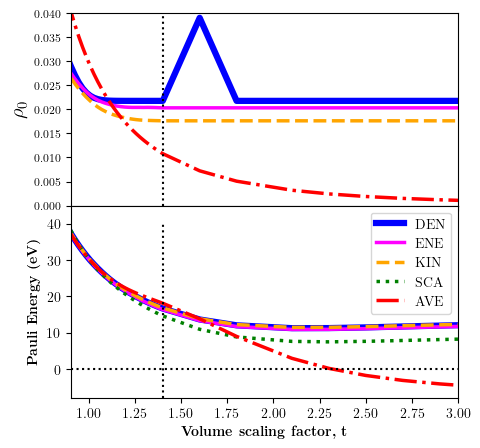

In [39]:
fig, axs = plt.subplots(2,1, figsize=(5,5),sharex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif', stretch='condensed')
axs[0].plot(r3, rho0_den3, 'b', linewidth=4.5, label='DEN' )
axs[0].plot(r3, rho0_ene3, color='magenta', linewidth=2.5, label='ENE' )
axs[0].plot(r3, rho0_kin3,'--', color='orange', linewidth=2.5, label='KIN' )
axs[0].plot(r3, np.asarray(rho0_mean[0]),'-.', color='red', linewidth=2.5, label='AVE' )
axs[0].set_xlim(0.9,3)
axs[0].set_ylim(0,0.04)
axs[0].vlines(x=1.4, ymin=0, ymax=0.5, ls='dotted', colors='k')
axs[0].tick_params(axis='both', labelsize=8)
# axs[0].legend()
axs[0].set_ylabel(r'\textbf{$\rho_0$}', fontsize=15)
axs[1].plot(r3, (wt_e_den['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, 'b', linewidth=4.5, label='DEN' )
axs[1].plot(r3, (wt_e_ene['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, color='magenta', linewidth=2.5, label='ENE' )
axs[1].plot(r3, (wt_e_kin['Si_8cd']-vw_e['Si_8cd'])*27.211407/8,'--', color='orange', linewidth=2.5, label='KIN' )
axs[1].plot(r3, (wt_e_sca['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, linestyle='dotted', color='green', linewidth=2.5, label='SCA' )
axs[1].plot(r3, (wt_e_ave['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, '-.', color='red', linewidth=2.5, label='AVE' )
fig.subplots_adjust(hspace=0)
axs[1].set_xlabel(r'\textbf{Volume scaling factor, t}')
axs[1].set_ylabel(r'\textbf{Pauli Energy (eV)}')
axs[1].hlines(y=0,xmin=0.9,xmax=3,ls='dotted',colors='k')
axs[1].vlines(x=1.4, ymin=-8, ymax=40, ls='dotted', colors='k')
axs[1].set_xlim(0.9,3)
axs[1].set_ylim(-8,45)
axs[1].legend()
plt.savefig(path_file+'/EOS/rho0_WT_vW3.png', bbox_inches='tight', dpi=200)


In [ ]:
r2 = np.linspace(0.8,1.4, 30)
plt.plot(r2, np.asarray(rho0_den[0]).ravel(), 'b', linewidth=4.5, label='DEN' )
plt.plot(r2, np.asarray(rho0_ene[0]).ravel(), color='magenta', linewidth=2.5, label='ENE' )
plt.plot(r2, np.asarray(rho0_kin[0]).ravel(),'--', color='orange', linewidth=2.5, label='KIN' )

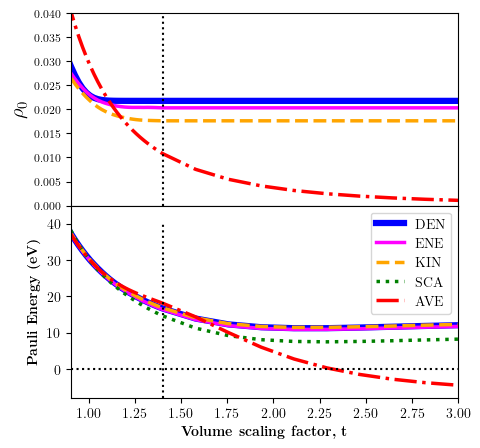

In [43]:
fig, axs = plt.subplots(2,1, figsize=(5,5),sharex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif', stretch='condensed')
axs[0].plot(r3, rho0_den3, 'b', linewidth=4.5, label='DEN' )
axs[0].plot(r3, rho0_ene3, color='magenta', linewidth=2.5, label='ENE' )
axs[0].plot(r3, rho0_kin3,'--', color='orange', linewidth=2.5, label='KIN' )
axs[0].plot(r3, np.asarray(rho0_mean[0]),'-.', color='red', linewidth=2.5, label='AVE' )
axs[0].set_xlim(0.9,3)
axs[0].set_ylim(0,0.04)
axs[0].vlines(x=1.4, ymin=0, ymax=0.5, ls='dotted', colors='k')
axs[0].tick_params(axis='both', labelsize=8)
# axs[0].legend()
axs[0].set_ylabel(r'\textbf{$\rho_0$}', fontsize=15)
axs[1].plot(r3, (wt_e_den['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, 'b', linewidth=4.5, label='DEN' )
axs[1].plot(r3, (wt_e_ene['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, color='magenta', linewidth=2.5, label='ENE' )
axs[1].plot(r3, (wt_e_kin['Si_8cd']-vw_e['Si_8cd'])*27.211407/8,'--', color='orange', linewidth=2.5, label='KIN' )
axs[1].plot(r3, (wt_e_sca['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, linestyle='dotted', color='green', linewidth=2.5, label='SCA' )
axs[1].plot(r3, (wt_e_ave['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, '-.', color='red', linewidth=2.5, label='AVE' )
fig.subplots_adjust(hspace=0)
axs[1].set_xlabel(r'\textbf{Volume scaling factor, t}')
axs[1].set_ylabel(r'\textbf{Pauli Energy (eV)}')
axs[1].hlines(y=0,xmin=0.9,xmax=3,ls='dotted',colors='k')
axs[1].vlines(x=1.4, ymin=-8, ymax=40, ls='dotted', colors='k')
axs[1].set_xlim(0.9,3)
axs[1].set_ylim(-8,45)
axs[1].legend()
plt.savefig(path_file+'/EOS/rho0_WT_vW3.png', bbox_inches='tight', dpi=200)
